In [10]:
# For text similarity and NLP evaluation metrics
from sklearn.metrics import confusion_matrix
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
from bert_score import score

# For readability scores
from textstat.textstat import textstat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('chatbot_conversational_flow.csv', encoding='latin1')

# Extract the relevant columns
queries = df['Question'].tolist()
chatbot_responses = df['Response'].tolist()
ground_truths = df['Answer'].tolist()

print(df.head())

                                            Question  \
0       What is the National Hydrogen Strategy 2050?   
1                    What is the Environmental Code?   
2  What are the targets of the Energy Policy Fram...   
3                       What is the Electricity Act?   
4  What is the Vision 2030 strategy for Saudi Ara...   

                                              Answer  \
0  The National Hydrogen Strategy 2050 aims to su...   
1  The Environmental Code regulates activities im...   
2  The Energy Policy Framework aims to reduce ene...   
3  The Electricity Act sets regulations on energy...   
4  Saudi Arabia aims to increase the share of nat...   

                                            Response  
0  The National Hydrogen Strategy 2050 is a long-...  
1  The Environmental Code is a legal framework de...  
2  The targets of the Energy Policy Framework (PO...  
3  The Electricity Act, specifically the version ...  
4  The Vision 2030 strategy for Saudi Arabia's en..

In [62]:
# Calculate BLEU Score
def calculate_bleu_score(references, hypotheses):
    # Tokenize each sentence into a list of words
    references_tokenized = [[ref.split()] for ref in references]
    hypotheses_tokenized = [hyp.split() for hyp in hypotheses]
    
    return corpus_bleu(references_tokenized, hypotheses_tokenized)

bleu_score = calculate_bleu_score(ground_truths, chatbot_responses)
print(f"BLEU Score: {bleu_score}")


BLEU Score: 0.0213826660962363


In [63]:
from rouge_score import rouge_scorer
import numpy as np

# Calculate ROUGE Score for multiple levels (1, 2, L)
def calculate_rouge_score(references, hypotheses):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = { 'rouge1': [], 'rouge2': [], 'rougeL': [] }
    
    # Calculate the scores for each reference and hypothesis pair
    for ref, hyp in zip(references, hypotheses):
        scores = scorer.score(ref, hyp)
        rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
        rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
        rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)
    
    # Return the average F1 scores for each ROUGE level
    return {key: np.mean(value) for key, value in rouge_scores.items()}

rouge_score = calculate_rouge_score(ground_truths, chatbot_responses)
print(f"ROUGE Scores: {rouge_score}")

ROUGE Scores: {'rouge1': np.float64(0.24536252933812788), 'rouge2': np.float64(0.07852629285930011), 'rougeL': np.float64(0.18582063927787298)}


In [30]:
!pip install spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 29.5 MB/s eta 0:00:00m eta 0:00:01m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.8/431.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.8 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.2 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 61.1 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 10.6 MB/s eta

In [65]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...


True

In [66]:
# Calculate METEOR Score
import spacy
from nltk.translate.meteor_score import meteor_score
import numpy as np

# Load spacy's English model
nlp = spacy.load("en_core_web_sm")

def calculate_meteor_score(references, hypotheses):
    # Tokenize each reference and hypothesis into a list of words
    references_tokenized = [[token.text.lower() for token in nlp(ref) if not token.is_punct] for ref in references]
    hypotheses_tokenized = [[token.text.lower() for token in nlp(hyp) if not token.is_punct] for hyp in hypotheses]
    
    # Calculate METEOR score
    return np.mean([meteor_score([ref], hyp) for ref, hyp in zip(references_tokenized, hypotheses_tokenized)])

meteor_score_value = calculate_meteor_score(ground_truths, chatbot_responses)
print(f"METEOR Score: {meteor_score_value}")# Example usage


METEOR Score: 0.2956950683874014


In [67]:
# Calculate BERT Score
def calculate_bertscore(references, hypotheses):
    P, R, F1 = score(hypotheses, references, lang='en')
    
    # Convert PyTorch tensor to NumPy array and calculate the mean of F1
    return np.mean(F1.cpu().detach().numpy())  # .cpu().detach() ensures it's on the CPU and not tracked for gradients

bertscore = calculate_bertscore(ground_truths, chatbot_responses)
print(f"BERTScore: {bertscore}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore: 0.8757642507553101


In [68]:
# Calculate Readability Scores
def readability_scores(text):
    return {
        'Flesch-Kincaid Grade Level': textstat.flesch_kincaid_grade(text),
        'Gunning Fog Index': textstat.gunning_fog(text),
        'Flesch Reading Ease': textstat.flesch_reading_ease(text)
    }

readability_results = [readability_scores(resp) for resp in chatbot_responses]

# Convert to a DataFrame for easy viewing
readability_df = pd.DataFrame(readability_results)
print(readability_df)

    Flesch-Kincaid Grade Level  Gunning Fog Index  Flesch Reading Ease
0                         14.2              15.62                32.22
1                         19.3              20.50                -2.64
2                         16.5              17.19                20.92
3                         19.6              23.57                 7.49
4                         14.9              16.40                25.19
..                         ...                ...                  ...
77                        17.9              23.28                11.96
78                        18.5              21.17                10.23
79                        19.4              20.34                13.31
80                        18.2              19.63                11.25
81                        15.7              15.27                22.95

[82 rows x 3 columns]


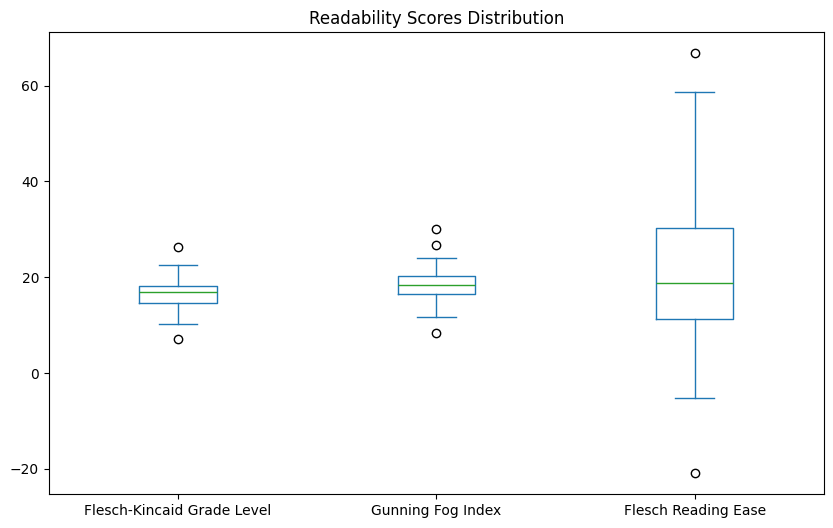

In [69]:
# Visualize the readability scores
readability_df.plot(kind='box', figsize=(10,6))
plt.title('Readability Scores Distribution')
plt.show()

In [70]:
def evaluate_chatbot_responses(queries, chatbot_responses, ground_truths):
    # BLEU
    bleu = calculate_bleu_score(ground_truths, chatbot_responses)
    
    # ROUGE
    rouge = calculate_rouge_score(ground_truths, chatbot_responses)
    
    # METEOR
    meteor = calculate_meteor_score(ground_truths, chatbot_responses)
    
    # BERTScore
    bertscore = calculate_bertscore(ground_truths, chatbot_responses)
    
    # Readability
    readability = [readability_scores(resp) for resp in chatbot_responses]
    readability_df = pd.DataFrame(readability)
    
    print(f"BLEU Score: {bleu}")
    print(f"ROUGE Score (1-L): {rouge}")
    print(f"METEOR Score: {meteor}")
    print(f"BERTScore: {bertscore}")
    print("Readability Scores: ")
    print(readability_df)

# Example usage
evaluate_chatbot_responses(queries, chatbot_responses, ground_truths)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BLEU Score: 0.0213826660962363
ROUGE Score (1-L): {'rouge1': np.float64(0.24536252933812788), 'rouge2': np.float64(0.07852629285930011), 'rougeL': np.float64(0.18582063927787298)}
METEOR Score: 0.2956950683874014
BERTScore: 0.8757642507553101
Readability Scores: 
    Flesch-Kincaid Grade Level  Gunning Fog Index  Flesch Reading Ease
0                         14.2              15.62                32.22
1                         19.3              20.50                -2.64
2                         16.5              17.19                20.92
3                         19.6              23.57                 7.49
4                         14.9              16.40                25.19
..                         ...                ...                  ...
77                        17.9              23.28                11.96
78                        18.5              21.17                10.23
79                        19.4              20.34                13.31
80                        